In [2]:
import pandas as pd
lap_times = pd.read_csv("lap_times.csv")
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [13]:
drivers = pd.read_csv("drivers.csv")
races = pd.read_csv("races.csv")
pit_stops = pd.read_csv("pit_stops.csv")

In [7]:
df = lap_times.merge(drivers, on="driverId")
df = df.merge(races, on="raceId")

In [9]:
df.head()

,raceId,driverId,lap,position,time_x,milliseconds,driverRef,number,code,forename,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,841,20,1,1,1:38.109,98109,vettel,5,VET,Sebastian,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,841,20,2,1,1:33.006,93006,vettel,5,VET,Sebastian,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,841,20,3,1,1:32.713,92713,vettel,5,VET,Sebastian,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,841,20,4,1,1:32.803,92803,vettel,5,VET,Sebastian,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,841,20,5,1,1:32.342,92342,vettel,5,VET,Sebastian,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


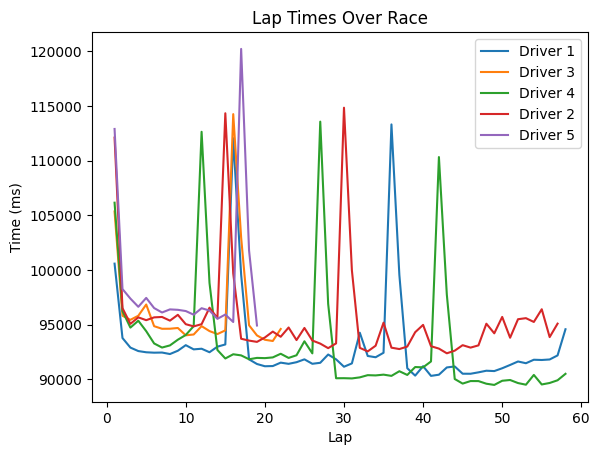

In [10]:
import matplotlib.pyplot as plt
race_laps = lap_times[lap_times["raceId"] == 841]
top5 = race_laps[race_laps['driverId'].isin([1, 2, 3, 4, 5])]
for driver in top5['driverId'].unique():
    plt.plot(top5[top5['driverId'] == driver]['lap'], top5[top5['driverId'] == driver]['milliseconds'], label=f"Driver {driver}")

plt.title("Lap Times Over Race")
plt.xlabel("Lap")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

<Axes: xlabel='driverId'>

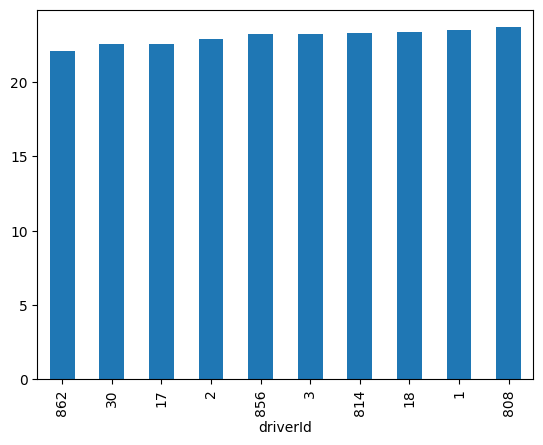

In [14]:
pit_stops['duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')
pit_stops.groupby('driverId')['duration'].mean().sort_values().head(10).plot(kind='bar')

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

df = full_stats[['avg_lap_time_ms', 'lap_time_std_dev', 'avg_pit_stop_sec', 'position']].dropna()

X = df[['avg_lap_time_ms', 'lap_time_std_dev', 'avg_pit_stop_sec']]
y = df['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

ModuleNotFoundError: No module named 'sklearn'

In [16]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
print(full_stats.columns)

NameError: name 'full_stats' is not defined

In [19]:
lap_stats = pd.merge(avg_lap_times, lap_consistency, on=['raceId', 'driverId'])
lap_stats = pd.merge(lap_stats, driver_standings[['raceId', 'driverId', 'position']], on=['raceId', 'driverId'])

pit_stops['duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')
avg_pit_duration = pit_stops.groupby(['raceId', 'driverId'])['duration'].mean().reset_index()
avg_pit_duration.rename(columns={'duration': 'avg_pit_stop_sec'}, inplace=True)

full_stats = pd.merge(lap_stats, avg_pit_duration, on=['raceId', 'driverId'], how='left')
full_stats.dropna(inplace=True)

print(full_stats.columns)

NameError: name 'avg_lap_times' is not defined

In [20]:
avg_lap_times = lap_times.groupby(['raceId', 'driverId'])['milliseconds'].mean().reset_index()
avg_lap_times.rename(columns={'milliseconds': 'avg_lap_time_ms'}, inplace=True)

lap_consistency = lap_times.groupby(['raceId', 'driverId'])['milliseconds'].std().reset_index()
lap_consistency.rename(columns={'milliseconds': 'lap_time_std_dev'}, inplace=True)

In [21]:
lap_stats = pd.merge(avg_lap_times, lap_consistency, on=['raceId', 'driverId'])
lap_stats = pd.merge(lap_stats, driver_standings[['raceId', 'driverId', 'position']], on=['raceId', 'driverId'])

pit_stops['duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')
avg_pit_duration = pit_stops.groupby(['raceId', 'driverId'])['duration'].mean().reset_index()
avg_pit_duration.rename(columns={'duration': 'avg_pit_stop_sec'}, inplace=True)

full_stats = pd.merge(lap_stats, avg_pit_duration, on=['raceId', 'driverId'], how='left')
full_stats.dropna(inplace=True)

print(full_stats.columns)

NameError: name 'driver_standings' is not defined

In [23]:
import pandas as pd
driver_standings = pd.read_csv("driver_standings.csv")

In [24]:
lap_stats = pd.merge(lap_stats, driver_standings[['raceId', 'driverId', 'position']], on=['raceId', 'driverId'])


In [25]:
lap_stats = pd.merge(avg_lap_times, lap_consistency, on=['raceId', 'driverId'])
lap_stats = pd.merge(lap_stats, driver_standings[['raceId', 'driverId', 'position']], on=['raceId', 'driverId'])

pit_stops['duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')
avg_pit_duration = pit_stops.groupby(['raceId', 'driverId'])['duration'].mean().reset_index()
avg_pit_duration.rename(columns={'duration': 'avg_pit_stop_sec'}, inplace=True)

full_stats = pd.merge(lap_stats, avg_pit_duration, on=['raceId', 'driverId'], how='left')
full_stats.dropna(inplace=True)

print(full_stats.columns)

Index(['raceId', 'driverId', 'avg_lap_time_ms', 'lap_time_std_dev', 'position',
       'avg_pit_stop_sec'],
      dtype='object')


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

df = full_stats[['avg_lap_time_ms', 'lap_time_std_dev', 'avg_pit_stop_sec', 'position']].dropna()

X = df[['avg_lap_time_ms', 'lap_time_std_dev', 'avg_pit_stop_sec']]
y = df['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 4.67


In [27]:
import joblib
joblib.dump(model, "f1_position_predictor.pkl")

['f1_position_predictor.pkl']

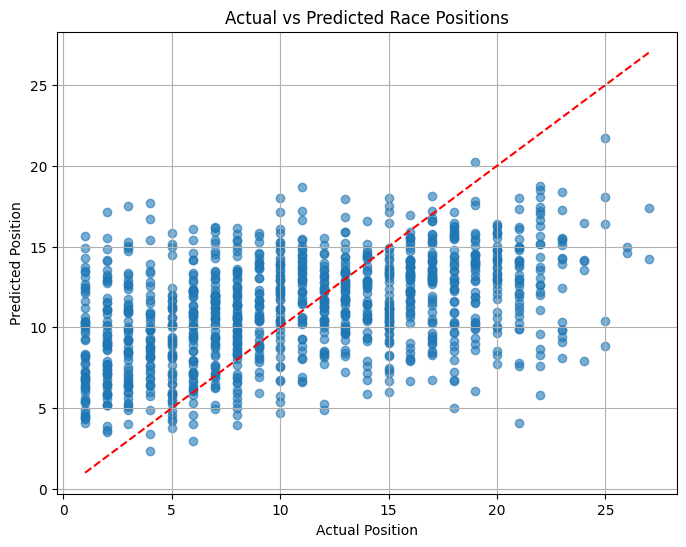

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.title("Actual vs Predicted Race Positions")
plt.grid(True)
plt.show()


In [29]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.1 MB 1.6 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/10.1 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/10.1 MB 2.1 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/10.1 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/10.1 MB 2.9 MB/s eta 0:00:03
   ------------------- -------------------- 5.0/10.1 MB 3.4 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/10.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 9.2/10.1 MB 4.8 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load("f1_position_predictor.pkl")

st.title("🏁 F1 Race Position Predictor")

# Input fields
lap_time = st.number_input("Average Lap Time (ms)", value=90000)
lap_std = st.number_input("Lap Time Std Deviation", value=3000)
pit_stop = st.number_input("Avg Pit Stop Duration (sec)", value=2.5)

# Predict
if st.button("Predict Position"):
    input_data = np.array([[lap_time, lap_std, pit_stop]])
    prediction = model.predict(input_data)
    st.success(f"🏆 Predicted Position: {int(round(prediction[0]))}")


2025-06-18 17:35:43.774 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-18 17:35:43.917 
  command:

    streamlit run C:\Users\kakad\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-18 17:35:43.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-18 17:35:43.919 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-18 17:35:43.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-18 17:35:43.921 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-18 17:35:43.921 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-18 17:35:43.922 Thre